In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Regression Task:
the task is to make a regression model that could inform whether the car you wanted to buy was good value in relation to the market in general.
The data is UK Used Car Data 

In [2]:
cars_df = pd.read_csv('./audi.csv')

In [3]:
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
cars_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Visualization of the data


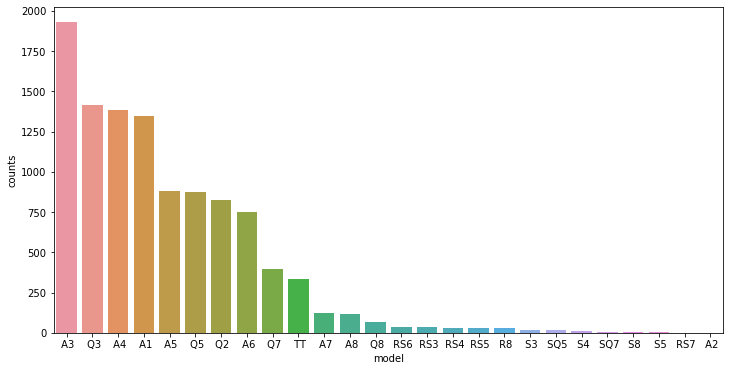

In [7]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)

amount_per_model=cars_df["model"].value_counts().rename_axis('model').reset_index(name='counts')

sns.barplot(x="model", y="counts",data=amount_per_model)




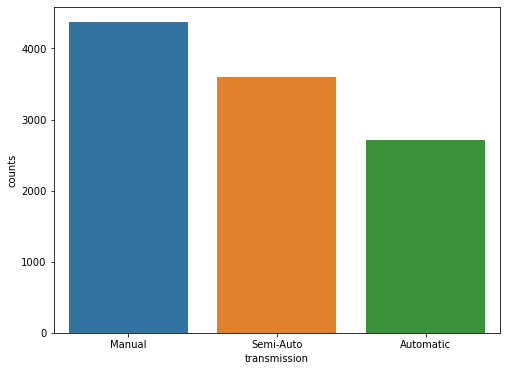

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

amount_per_transmission=cars_df["transmission"].value_counts().rename_axis('transmission').reset_index(name='counts')

sns.barplot(x="transmission", y="counts",data=amount_per_transmission)

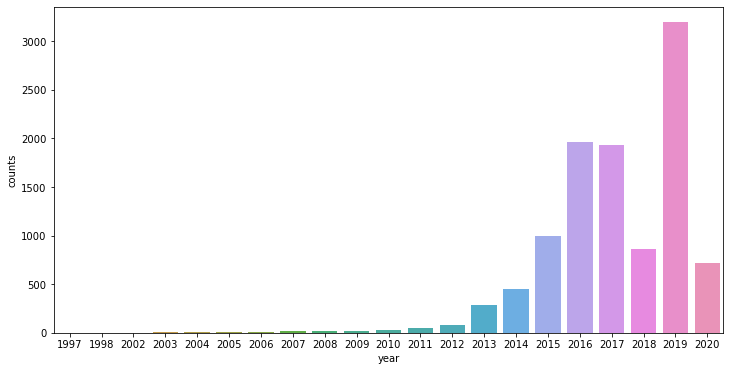

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
amount_per_year=cars_df["year"].value_counts().rename_axis('year').reset_index(name='counts')
sns.barplot(x="year", y="counts",data=amount_per_year)

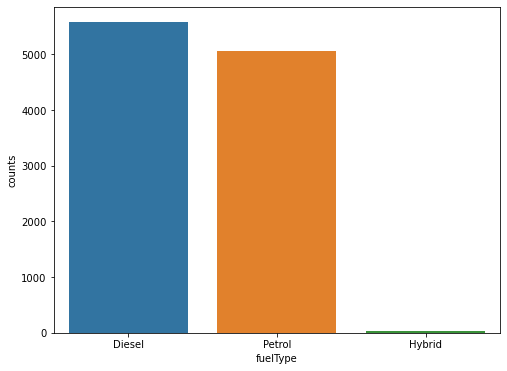

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
amount_per_fuel_type=cars_df["fuelType"].value_counts().rename_axis('fuelType').reset_index(name='counts')
sns.barplot(x="fuelType", y="counts",data=amount_per_fuel_type)

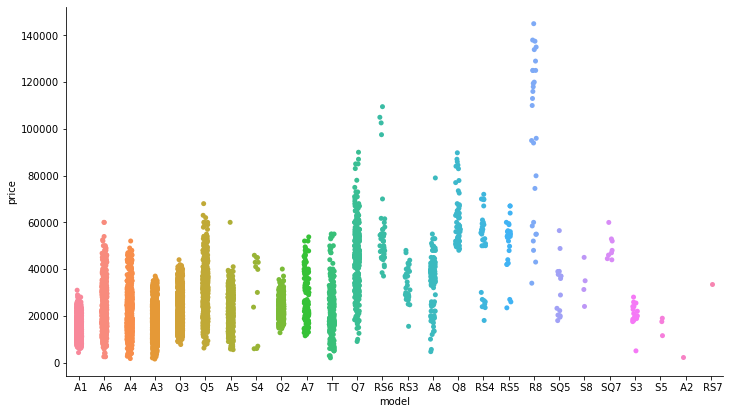

In [11]:
cars_cat_plot = sns.catplot(x="model", y="price" ,data=cars_df)
cars_cat_plot.fig.set_figwidth(12)
cars_cat_plot.fig.set_figheight(6)


In [12]:
cars_df.loc[cars_df["price"]<40000].size

cars_df.loc[cars_df["price"]<40000].size/cars_df.size

0.9310086239220098

<h3> what we can see from the plots is that there are cars that are outliers since they cost much more compared to the model that are sold most frequently.
more than 90% of the cars are below 40K pounds, that is why I will use the standard scaler instead of the min-max scaler

</h3>

In [13]:
cars_df[["model","price"]].groupby("model").mean().reset_index().sort_values('price', ascending=False)

,model,price
13,R8,97652.214286
12,Q8,60115.014493
17,RS6,55963.871795
16,RS5,51265.206897
15,RS4,50151.612903
24,SQ7,49269.000000
11,Q7,44788.319899
7,A8,34981.847458
14,RS3,34050.515152
22,S8,33807.750000


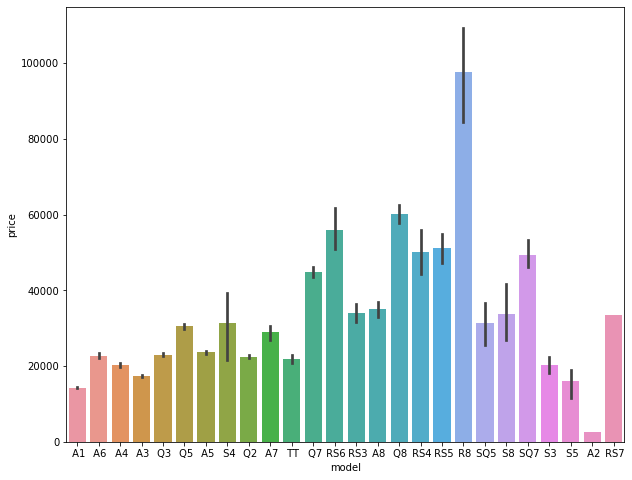

In [14]:
fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.barplot(x="model", y="price", data=cars_df)
plt.show()


average price per model - we can see that the R8 is much more expensive than the other models

0.9069178852643419


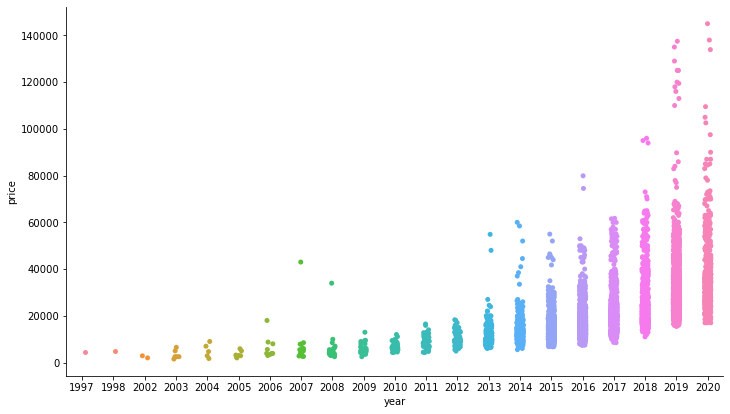

In [15]:
cars_cat_plot_price_year = sns.catplot(x="year", y="price" ,data=cars_df)
cars_cat_plot_price_year.fig.set_figwidth(12)
cars_cat_plot_price_year.fig.set_figheight(6)

print(cars_df.loc[cars_df["year"]>2014].size/cars_df.size)

most of the cars sold are from the year 2014 onwards -  we can interpret that from the density of the graph.


I have decided to create a new column that contains that age of the car compared to 2021

In [16]:
cars_df["age_of_car"] = 2021 - cars_df["year"]
cars_df = cars_df.drop(columns = ["year"])
cars_df.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
9366,A3,10490,Manual,44000,Diesel,20,70.6,1.6,5
222,Q7,59995,Automatic,10,Diesel,145,33.2,3.0,2
232,A1,19685,Manual,10,Petrol,145,49.6,1.0,2
4806,A1,17990,Manual,30518,Petrol,235,39.8,2.0,4
7212,A6,20990,Semi-Auto,32978,Petrol,145,47.9,1.8,3
10569,Q3,17750,Automatic,39726,Diesel,145,51.4,2.0,5
6566,A5,24475,Semi-Auto,34733,Petrol,145,50.4,2.0,3
9470,A3,23990,Manual,1639,Diesel,145,52.3,1.6,2
6464,A1,13766,Manual,6829,Petrol,150,56.5,1.4,4
3179,A4,25986,Semi-Auto,10221,Petrol,145,38.2,2.0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3c5ac0>,
      dtype=object)

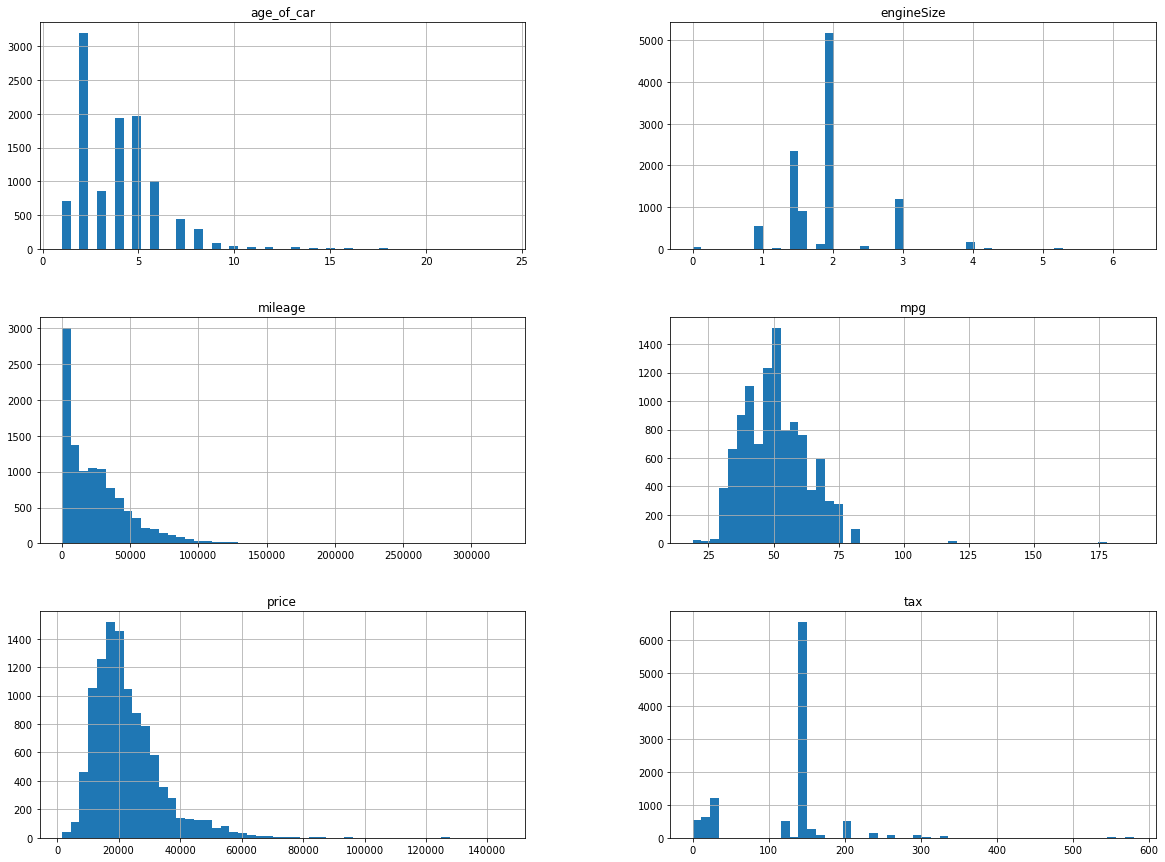

In [17]:
cars_df.hist(bins=50, figsize=(20,15))

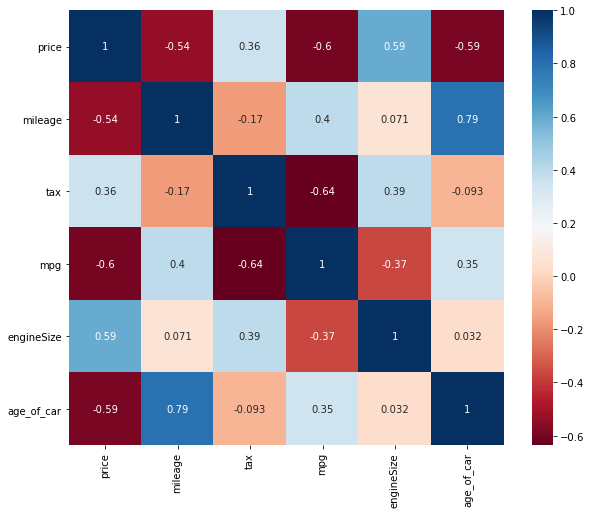

In [18]:
colormap = plt.cm.RdBu
sns.heatmap(cars_df.corr(), annot=True, cmap=colormap,square=True )
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

# Preparing the data for the models

In [19]:
cars_df_with_dummies = pd.get_dummies(cars_df)
cars_df_with_dummies

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,4,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,16999,4018,145,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,16999,1978,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,17199,609,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,19499,8646,150,47.9,1.4,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [20]:

cars_without_price = cars_df_with_dummies.drop(['price'],axis=1)
price_label = cars_df_with_dummies['price']
X_train,X_test,y_train,y_test = train_test_split(cars_without_price,price_label,test_size=0.2,random_state=42)


In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
initial_prediction = linear_reg.predict(X_test)

linear_ref_rmse = mean_squared_error(y_test, initial_prediction)

print(linear_reg.score(cars_without_price,price_label))
print(np.sqrt(linear_ref_rmse))

0.8915457669809329
3963.675558703946


In [22]:
results = {}
results["predicted"] = initial_prediction
results["actual"]= y_test
comparison_frame = pd.DataFrame.from_dict(results)
comparison_frame['predicted'] = comparison_frame['predicted'].round(2)
comparison_frame

,predicted,actual
10442,8967.90,9990
2907,22978.39,22382
7388,29278.25,28990
3016,27238.57,30777
7890,14834.16,14950
...,...,...
8606,30243.98,31450
8977,17080.11,12900
3673,18043.67,16750
1034,23122.03,21996


# Now i will apply the standard scaler on the data and will see whether or not it improves the accuracy

In [56]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_ref_rmse = mean_squared_error(y_test, linear_reg.predict(X_test))

print(np.sqrt(linear_ref_rmse))

52545711708746.8
